# Athar Dataset

Analysis of the citation corpus manually annotated by Awais Athar.

The script will download and unzip the citation sentiment corpus from http://cl.awaisathar.com/citation-sentiment-corpus/.

This dataset contains 8736 sentences taken from different scientific papers. These sentences ares classified as positive (p), negative (n) or neutral (o).

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

import nltk

In [3]:
import sys
sys.path.append('../')

from citation_sentiment_analysis.datasets.athar import (
    download_and_read_athar_txt_with_sentiment_label,
    get_athar_sentence_lengths,
    sort_athar_by_sentence_lengths
)
from citation_sentiment_analysis.datasets.words_en import download_and_read_english_words
from citation_sentiment_analysis.utils.collection import iter_flatten
from citation_sentiment_analysis.utils.jupyter import printmd
from citation_sentiment_analysis.utils.plot import bar_plot_with_numbers, configure_default_plot_style

In [4]:
configure_default_plot_style()

In [5]:
athar_all_df = download_and_read_athar_txt_with_sentiment_label()
athar_all_df.head()

,source_paper_id,target_paper_id,sentiment,citation_text,sentiment_label
0,A00-1043,A00-2024,o,We analyzed a set of articles and identified s...,neutral
1,H05-1033,A00-2024,o,Table 3: Example compressions Compression AvgL...,neutral
2,I05-2009,A00-2024,o,5.3 Related works and discussion Our two-step ...,neutral
3,I05-2009,A00-2024,o,(1999) proposed a summarization system based o...,neutral
4,I05-2009,A00-2024,o,We found that the deletion of lead parts did n...,neutral


,count
neutral,7627
positive,829
negative,280


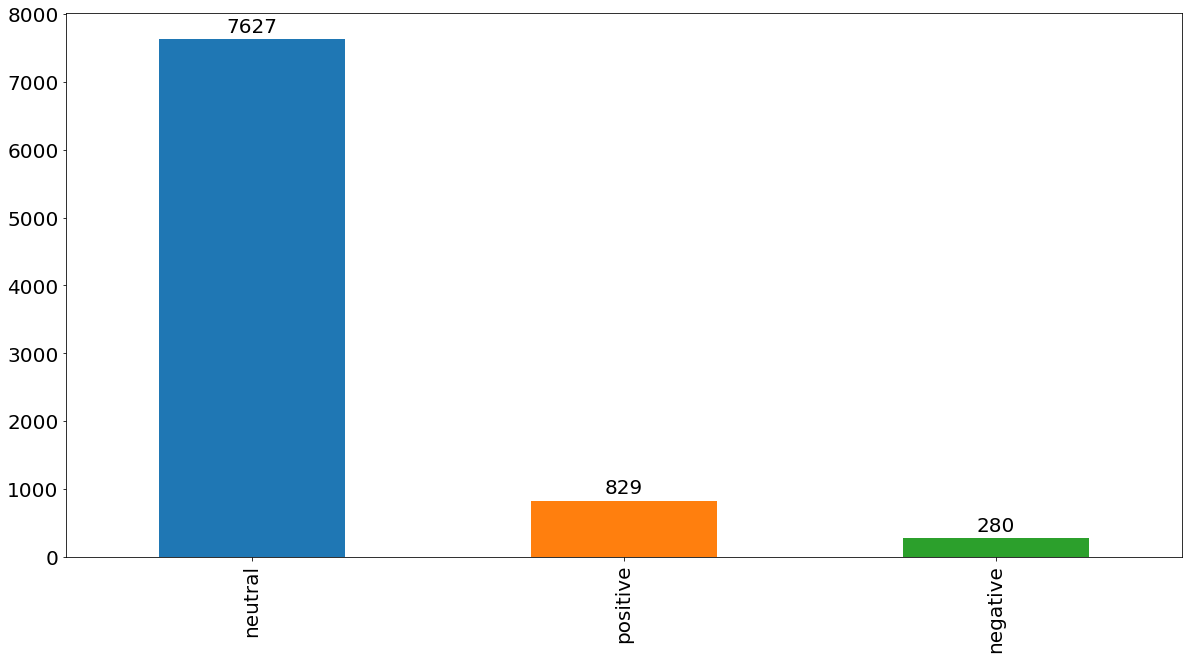

In [6]:
def show_sentiment_counts(df):
    display(df['sentiment_label'].value_counts().to_frame('count'))
    bar_plot_with_numbers(df['sentiment_label'].value_counts())

show_sentiment_counts(athar_all_df)

,count,mean,std,min,25%,50%,75%,max
citation_text,8736.0,233.327152,485.567698,12.0,139.0,193.0,269.0,30057.0


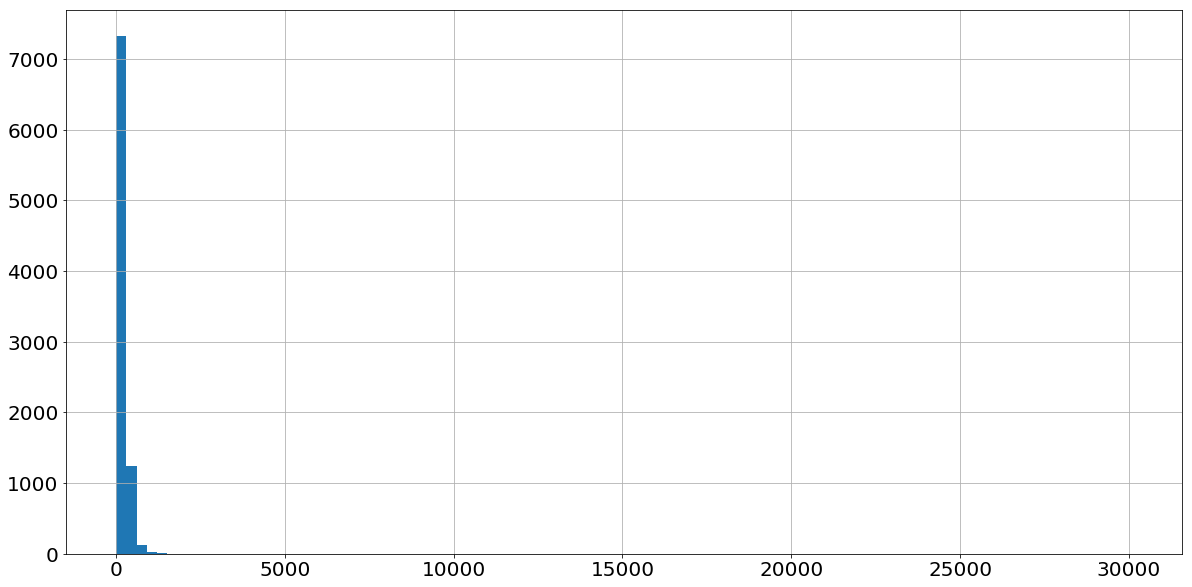

In [7]:
sentence_lengths = get_athar_sentence_lengths(athar_all_df)
display(sentence_lengths.describe().to_frame().T)
sentence_lengths.hist(bins=100)
None

The above graph shows that there are some very long sentences (up to 30k characters).
The mean is around 230.

Let's look at some of those long sentences.

In [8]:
athar_all_by_length_df = sort_athar_by_sentence_lengths(athar_all_df, sentence_lengths)
printmd('\n\n'.join(
    '> %.1000s... (%s chars, **%s**)' % (row['citation_text'], len(row['citation_text']), row['sentiment_label'])
    for row in athar_all_by_length_df.tail(3).to_dict(orient='records')
))

> It us widely acknowledged that word sense d~samblguatmn (WSD) us a central problem m natural language processing In order for computers to be able to understand and process natural language beyond simple keyword matching, the problem of d~samblguatmg word sense, or dlscermng the meamng of a word m context, must be effectively dealt with Advances in WSD v, ill have slgmficant Impact on apphcatlons hke information retrieval and machine translation For natural language subtasks hke part-of-speech tagging or s)ntactm parsing, there are relatlvely well defined and agreed-upon cnterm of what it means to have the "correct" part of speech or syntactic structure assigned to a word or sentence For instance, the Penn Treebank corpus (Marcus et al, 1993) pro~ide~,t large repo.~tory of texts annotated w~th partof-speech and s}ntactm structure mformatlon Tv.o independent human annotators can achieve a high rate of agreement on assigning part-of-speech tags to words m a g~ven sentence Unfortunately, ... (12518 chars, **positive**)

> ,.~.eqmvalent ot duty in a parallel French text, the correct sense of the Enghsh word is identified These studies exploit th~s lnformatmn m order to gather co-occurrence data for the different senses, which ts then used to dtsamb~guate new texts In related work, Dywk (1998) used patterns of translational relatmns in an EnghshNorwegian paralle ! corpus (ENPC, Oslo Umverslty) to define semantic propemes such as synonymy, ambtgmty, vagueness, and semantic helds and suggested a derivation otsemantic representations for signs (eg, lexemes), captunng semantm relatmnshlps such as hyponymy etc, fiom such translatmnal relatmns Recently, Resnlk and Yarowsky (1997) suggested that fol the purposes ot WSD, the different senses of a wo~d could be detelmlned by considering only sense d~stmctmns that are lextcahzed cross-hngmstlcally In particular, they propose that some set of target languages be ~dent~fied, and that the sense d~stmctmns to be considered for language processing appllcatmns and evalua... (23947 chars, **neutral**)

> Towards a Meaning-Full Comparison of Lexieal Resources Kenneth C Lltkowska CL Research 9208 Gue Road Damascus, MD 20872 ken@clres corn http//www tires tom Abstract The mapping from WordNet to Hector senses m Senseval provides a "gold standard" against wluch to judge our ability to compare lexlcal resources The "gold standard" is provided through a word overlap analysis (with and without a stop list) for flus mapping, achieving at most a 36 percent correct mapping (inflated by 9 percent from "empty" assignments) An alternaUve componenttal analysis of the defimtaons, using syntacUc, collocatmnal, and semantac component and relation identification (through the use ofdefimng patterns integrated seamlessly mto the parsing thclaonary), provides an almost 41 percent correct mapping, with an additaonal 4 percent by recogmzmg semantic components not used in the Senseval mapping Defimtion sets of the Senseval words from three pubhshed thclaonanes and Dorr's lextcal knowledge base were added to W... (30057 chars, **neutral**)

The above examples show that the sentence separation seem to have been lost and therefore the sentiment doesn't reflect a sentiment of an individual citation.

Before we remove them, let's look at the sentiment of those long sentences:

,count
neutral,35
positive,2


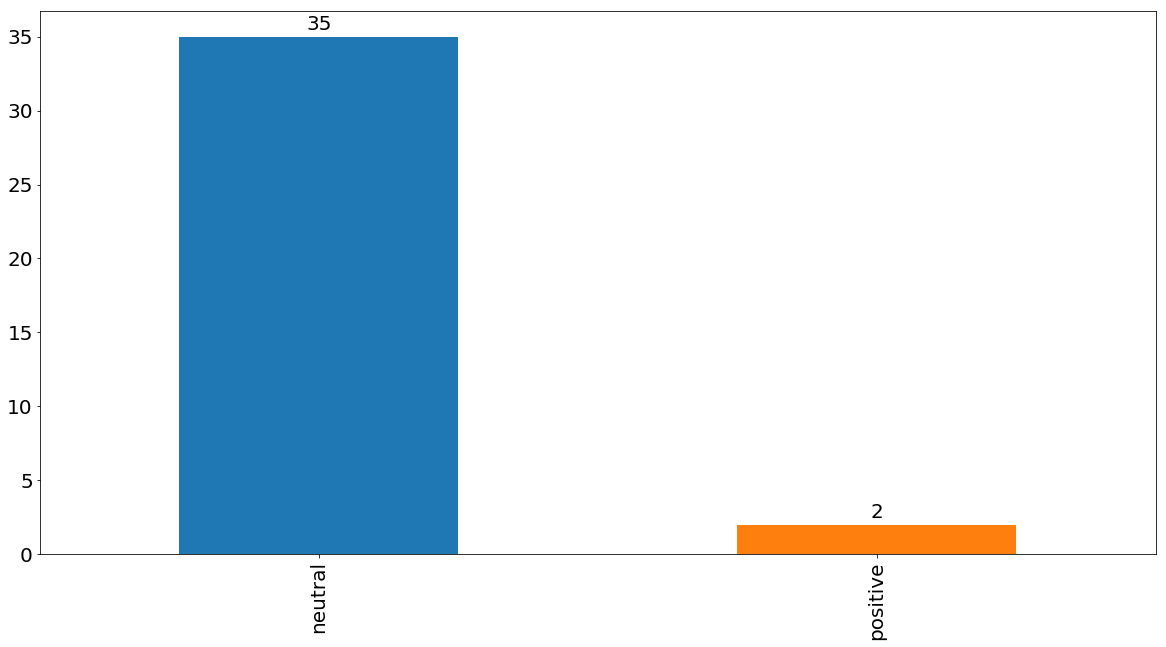

In [9]:
show_sentiment_counts(athar_all_df[sentence_lengths > 1000])

All of the very long sentences are either neutral or with two exceptions positive.

For our analysis it seems sensible to ignore all sentences over 1000 characters long.

,count
neutral,7592
positive,827
negative,280


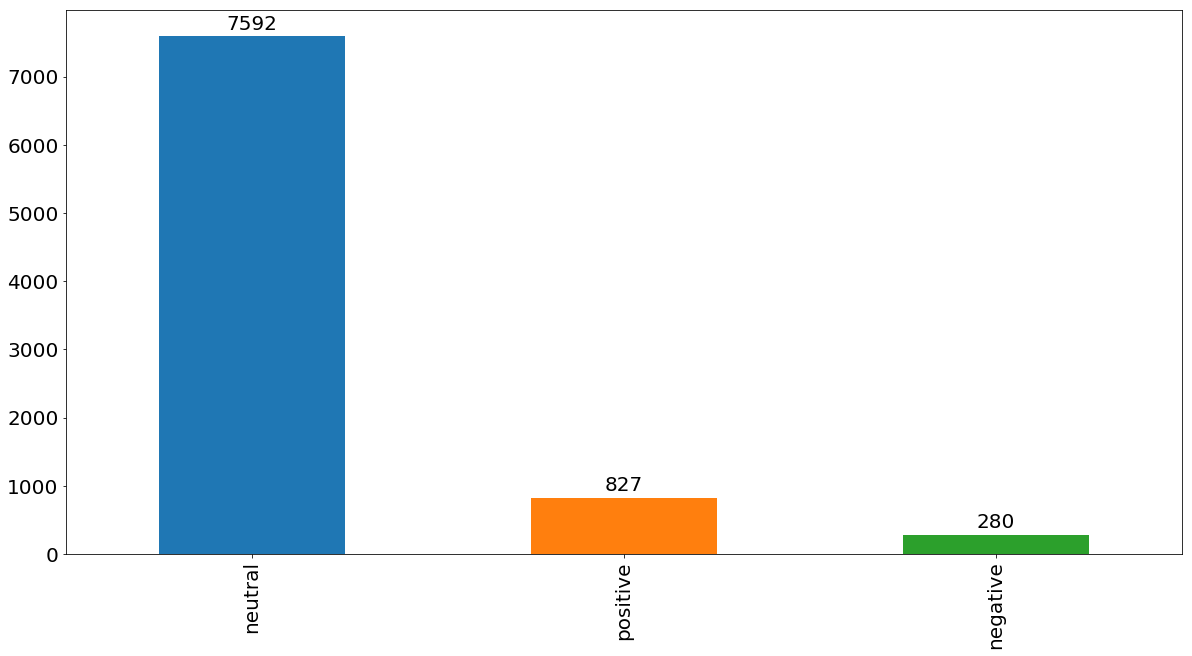

In [10]:
athar_df = athar_all_df[sentence_lengths <= 1000]

show_sentiment_counts(athar_df)

## Text tokenization

In [11]:
citation_texts = athar_df['citation_text']

citation_tokens = [nltk.word_tokenize(s) for s in citation_texts]
print('total tokens: %d, unique: %d' % (
    sum(len(tokens) for tokens in citation_tokens),
    len({t for tokens in citation_tokens for t in tokens})
))
print(citation_tokens[0][:20])

total tokens: 384256, unique: 19323
['We', 'analyzed', 'a', 'set', 'of', 'articles', 'and', 'identified', 'six', 'major', 'operations', 'that', 'can', 'be', 'used', 'for', 'editing', 'the', 'extracted', 'sentences']


In [12]:
def get_token_counts(tokens):
    return pd.Series(list(tokens)).to_frame('token').groupby('token').size().sort_values(ascending=False)

,count,mean,std,min,25%,50%,75%,max
token count stats,19323.0,19.885939,340.924942,1.0,1.0,2.0,4.0,28969.0


token,",",),(,.,the,and,et,of,;,a
most frequent tokens,28969,17641,17549,13607,11806,10952,7284,7079,6375,4720


token,attains,attaining,attacking,attacked,attachments,attaching,attaches,ators,atnaparkhi,afterSVDonthesparsematrix
least frequent tokens,1,1,1,1,1,1,1,1,1,1


token,stems,Context,2http,28,k=1,hence,U|E,Bank,want,stated
less than 10,9,9,9,9,9,9,9,9,9,9


total number of tokens: **19323**

number of tokens only appearing once: **9592**

number of tokens appearing less than 10 times: **16546**

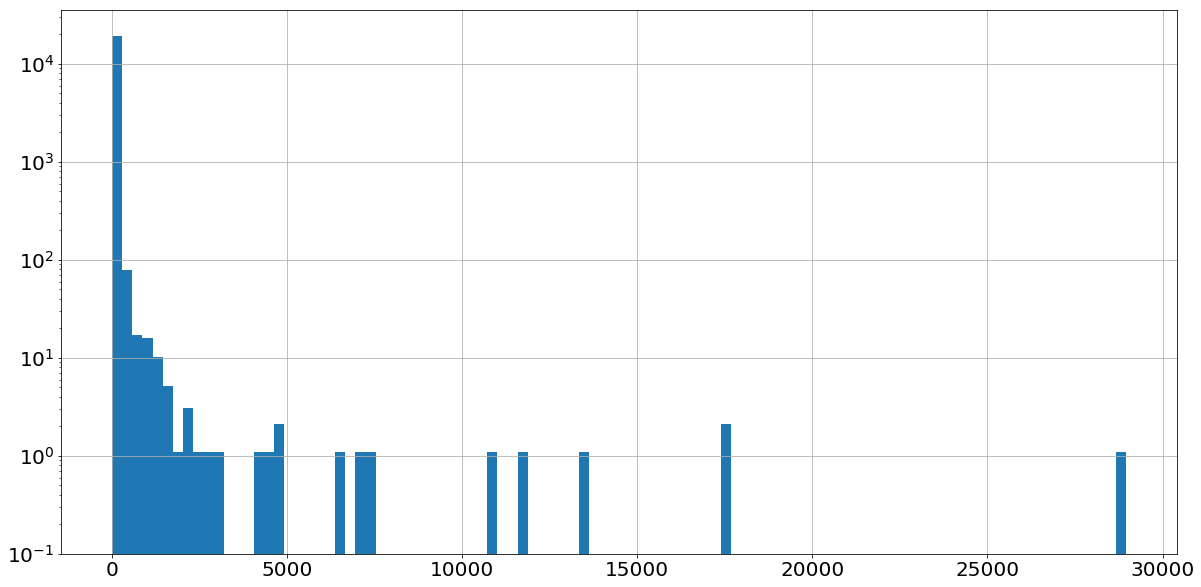

In [13]:
token_counts = get_token_counts(iter_flatten(citation_tokens))
display(token_counts.describe().to_frame('token count stats').T)
display(token_counts.head(10).to_frame('most frequent tokens').T)
display(token_counts.tail(10).to_frame('least frequent tokens').T)
display(token_counts[token_counts < 10].head(10).to_frame('less than 10').T)
printmd('total number of tokens: **%s**' % len(token_counts))
printmd('number of tokens only appearing once: **%s**' % sum(token_counts == 1))
printmd('number of tokens appearing less than 10 times: **%s**' % sum(token_counts < 10))

fig, ax = plt.subplots()
token_counts.hist(ax=ax, bins=100, bottom=0.1)
ax.set_yscale('log')

The above example shows that the tokenizer returns symbols such as `.`.

In [14]:
def has_alpha(s):
    return any(c.isalpha() for c in s)


def has_numeric(s):
    return any(c.isnumeric() for c in s)


has_alpha_mask = [has_alpha(s) for s in token_counts.index]

has_but_not_all_alpha_mask = has_alpha_mask & ~token_counts.index.str.isalpha()
display(token_counts[has_but_not_all_alpha_mask].head(20).to_frame('has some, but not all alpha characters'))

display(pd.DataFrame([{
    'all alpha': sum(token_counts.index.str.isalpha()),
    'all numeric': sum(token_counts.index.str.isnumeric()),
    'has alpha': sum(has_alpha_mask),
    'has, but not all alpha': sum(has_but_not_all_alpha_mask),
    'has numeric': sum(has_numeric(s) for s in token_counts.index),
}]))

,"has some, but not all alpha characters"
token,
al.,2589
e.g,283
phrase-based,227
e.g.,196
GIZA++,172
log-linear,113
part-of-speech,108
n-gram,102
's,98


,all alpha,all numeric,has alpha,has numeric,"has, but not all alpha"
0,12870,581,17349,3792,4479


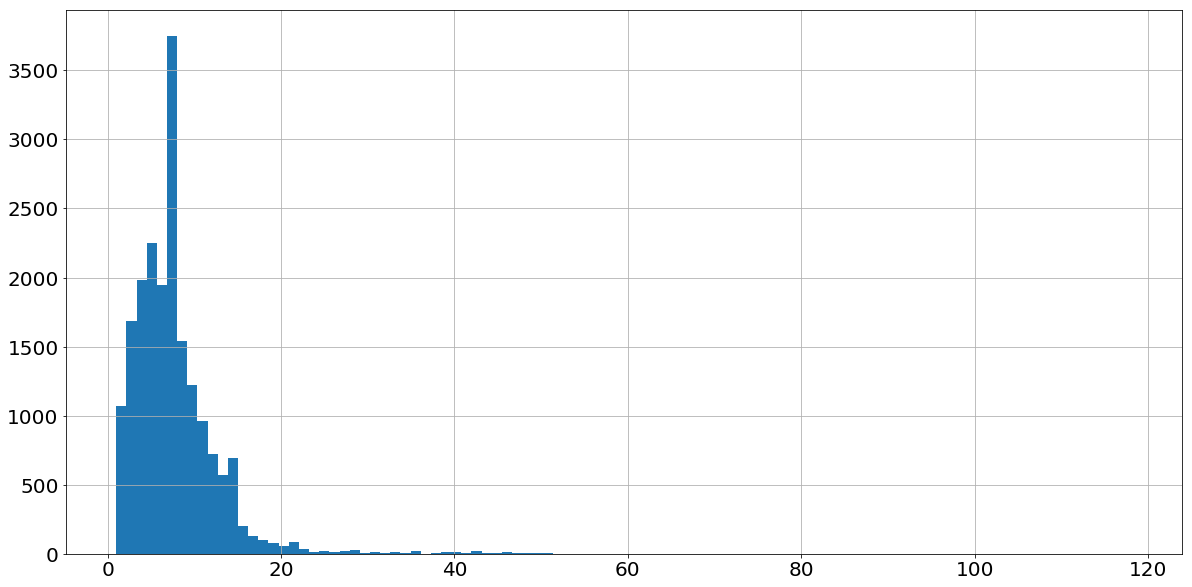

In [15]:
token_lengths = pd.Series(token_counts.index).str.len()
pd.Series(token_lengths).hist(bins=100)
None

In [16]:
token_counts_sorted_by_lengths = token_counts.iloc[token_lengths.sort_values().index]
display(token_counts_sorted_by_lengths.head(20).to_frame('shortest tokens').T)
display(token_counts_sorted_by_lengths.tail(20).to_frame('longet tokens'))

token,",",\,x,j,w,?,!,n,g,Z,6,V,q,m,c,0,u,},t,s
shortest tokens,28969,138,123,119,119,117,20,110,18,21,97,22,23,93,90,89,25,100,142,142


,longet tokens
token,
D0D3D3D3D3D3D3D3D3D3D3D3D1D3D3D3D3D3D3D3D3D3D3D3D2,1
obtainthescoreforthetranslationeforaninputsentence,1
//www.cs.cornell.edu/people/pabo/movie-review-data/,1
reintroducedundertherubricofwordsensedisambiguation,2
a31a49a48a17a20a22a32a34a33a50a35a38a37a39a32a41a40,1
//www.cs.cornell.edu/People/pabo/movie-review-data/,1
asystem-generatedsummaryagainstasetofhumangenerated,1
alignmentisusedtoobtainlexicalphrasetranslationpairs,1
.opportunitiesequalcreatetofailedhasprojecteuropeanthe,1


The above examples show that the some of the orginal text is missing word separations. It also contains single character tokens.

## Token filtering

In [17]:
# Let's keep only known English words, that are longer than two characters (except the word "no")
# This is in: citation_sentiment_analysis.preprocessing.get_default_words_to_include
words_to_include = {
    t for t in download_and_read_english_words() if len(t) > 2
} | {'no'}

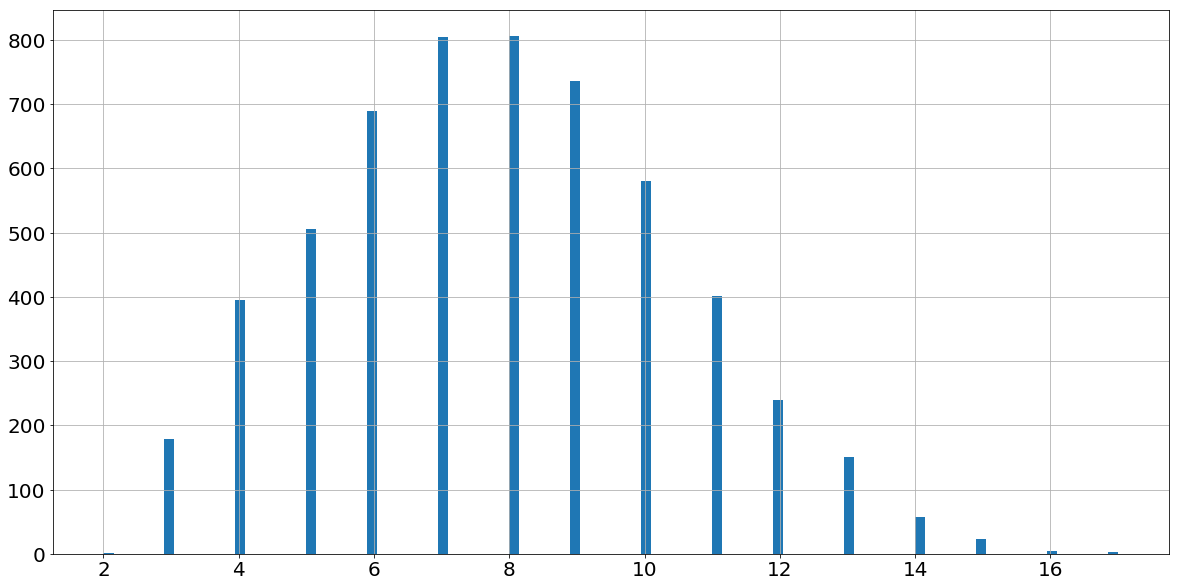

In [18]:
filtered_tokens = pd.Series([
    t for t in token_counts.index if t in words_to_include
])
filtered_tokens_length = filtered_tokens.str.len().sort_values()
pd.Series(filtered_tokens_length).hist(bins=100)
None

In [19]:
filtered_tokens_sorted_by_length = filtered_tokens.iloc[filtered_tokens_length.index]
display(filtered_tokens_sorted_by_length.head(20).to_frame('shortest filtered tokens'))
display(filtered_tokens_sorted_by_length.tail(20).to_frame('longest filtered tokens'))

,shortest filtered tokens
236,no
0,the
1879,row
5458,bed
217,how
4019,mal
4028,loc
228,new
1725,eat
241,any


,longest filtered tokens
3639,interchangeable
2737,generalizations
1174,transliteration
2474,interpretations
4573,syllabification
585,representations
3106,morphologically
4875,psychologically
1791,implementations
3739,inconsistencies


We are now ending up with more useful tokens.

The above could be fine tuned further to keep words that may not be in the English words list but are useful compound words.

In [20]:
stop_words = nltk.corpus.stopwords.words('english')

In [22]:
len(stop_words)

179

In [23]:
printmd('> %s' % ' '.join(stop_words))

> i me my myself we our ours ourselves you you're you've you'll you'd your yours yourself yourselves he him his himself she she's her hers herself it it's its itself they them their theirs themselves what which who whom this that that'll these those am is are was were be been being have has had having do does did doing a an the and but if or because as until while of at by for with about against between into through during before after above below to from up down in out on off over under again further then once here there when where why how all any both each few more most other some such no nor not only own same so than too very s t can will just don don't should should've now d ll m o re ve y ain aren aren't couldn couldn't didn didn't doesn doesn't hadn hadn't hasn hasn't haven haven't isn isn't ma mightn mightn't mustn mustn't needn needn't shan shan't shouldn shouldn't wasn wasn't weren weren't won won't wouldn wouldn't